# Dataset for Interns
## Objective:
### To analyze the skill sets of each candidate (Using NLP) and predict if a candidate will be selected or not based on those skills.

### Loading the data and other imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df=pd.read_excel (r'C:\Users\stuti\Downloads\Dataset for Interns.xlsx')

In [3]:
df.head()

,Candidates_001,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,First Name,Career Page Invite Status,City,State/Province,Zip/Postal Code,Experience in Years,Current Employer,Current Job Title,Skill Set,Opt-In Status,Opt-In Mode,Opt-In Date,I Agree,Highest Qualification Held,Created Time,Modified Time,Source,Email Opt Out,Is Hot Candidate,Candidate Status,Willing to work on Contract (min 3 months),LinkedIn Profile,Willing to work on Contract?,Gender
1,Sukhmani,Invited,Chandrapur,Maharashtra,442401,1,NaN,NaN,NaN,Opt-In Provided,Webform,12/07/2020,True,M.B.A,12/07/2020 11:28 AM,12/07/2020 11:28 AM,CareerSite,False,False,Associated,False,NaN,NaN,Female
2,Abhishek,To-be-invited,DDD,DDD,NaN,12,asdadsdsa,NaN,adsadaasda,Opt-In Provided,Webform,04/07/2020,True,M.C.A.,05/07/2020 05:13 AM,05/07/2020 05:13 AM,CareerSite,False,False,New,False,NaN,6-9 Months,Female
3,Parul,Invited,Jaipur,Rajasthan,302006,1,NaN,NaN,NaN,Opt-In Provided,Webform,28/06/2020,True,B.E.,28/06/2020 11:15 PM,28/06/2020 11:15 PM,CareerSite,False,False,Associated,False,https://www.linkedin.com/in/parul-shrivastava-...,NaN,Female
4,Arnab,Invited,Bengaluru,Karnataka,560078,0,NaN,NaN,NaN,Opt-In Provided,Others,26/06/2020,True,B.E.,27/06/2020 01:13 AM,27/06/2020 01:20 AM,CareerSite,False,False,Associated,False,NaN,NaN,Male


### Renaming the columns

In [4]:
df.rename( columns={'Unnamed: 1':'Career Page Invite Status'}, inplace=True )
df.rename( columns={'Unnamed: 2':'City'}, inplace=True )
df.rename( columns={'Unnamed: 3':'State/Province'}, inplace=True )
df.rename( columns={'Unnamed: 4':'Zip/Postal Code'}, inplace=True )
df.rename( columns={'Unnamed: 5':'Experience in Years'}, inplace=True )
df.rename( columns={'Unnamed: 6':'Current Employer'}, inplace=True )
df.rename( columns={'Unnamed: 7':'Current Job Title'}, inplace=True )
df.rename( columns={'Unnamed: 8':'Skill Set'}, inplace=True )
df.rename( columns={'Unnamed: 9':'Opt-In Status'}, inplace=True )
df.rename( columns={'Unnamed: 10':'Opt-In Mode'}, inplace=True )
df.rename( columns={'Unnamed: 11':'Opt-In Date'}, inplace=True )
df.rename( columns={'Unnamed: 12':'I Agree'}, inplace=True )
df.rename( columns={'Unnamed: 13':'Highest Qualification Held'}, inplace=True )
df.rename( columns={'Unnamed: 14':'Created Time'}, inplace=True )
df.rename( columns={'Unnamed: 15':'Modified Time'}, inplace=True )
df.rename( columns={'Unnamed: 16':'Source'}, inplace=True )
df.rename( columns={'Unnamed: 17':'Email Opt Out'}, inplace=True )
df.rename( columns={'Unnamed: 18':'Is Hot Candidate'}, inplace=True )
df.rename( columns={'Unnamed: 19':'Candidate Status'}, inplace=True )
df.rename( columns={'Unnamed: 20':'Willing to work on Contract (min 3 months)'}, inplace=True )
df.rename( columns={'Unnamed: 21':'LinkedIn Profile'}, inplace=True )
df.rename( columns={'Unnamed: 22':'Willing to work on Contract?'}, inplace=True )
df.rename( columns={'Unnamed: 23':'Gender'}, inplace=True )
df.drop(df.index[0],inplace=True)
df.head()

,Candidates_001,Career Page Invite Status,City,State/Province,Zip/Postal Code,Experience in Years,Current Employer,Current Job Title,Skill Set,Opt-In Status,Opt-In Mode,Opt-In Date,I Agree,Highest Qualification Held,Created Time,Modified Time,Source,Email Opt Out,Is Hot Candidate,Candidate Status,Willing to work on Contract (min 3 months),LinkedIn Profile,Willing to work on Contract?,Gender
1,Sukhmani,Invited,Chandrapur,Maharashtra,442401,1,NaN,NaN,NaN,Opt-In Provided,Webform,12/07/2020,True,M.B.A,12/07/2020 11:28 AM,12/07/2020 11:28 AM,CareerSite,False,False,Associated,False,NaN,NaN,Female
2,Abhishek,To-be-invited,DDD,DDD,NaN,12,asdadsdsa,NaN,adsadaasda,Opt-In Provided,Webform,04/07/2020,True,M.C.A.,05/07/2020 05:13 AM,05/07/2020 05:13 AM,CareerSite,False,False,New,False,NaN,6-9 Months,Female
3,Parul,Invited,Jaipur,Rajasthan,302006,1,NaN,NaN,NaN,Opt-In Provided,Webform,28/06/2020,True,B.E.,28/06/2020 11:15 PM,28/06/2020 11:15 PM,CareerSite,False,False,Associated,False,https://www.linkedin.com/in/parul-shrivastava-...,NaN,Female
4,Arnab,Invited,Bengaluru,Karnataka,560078,0,NaN,NaN,NaN,Opt-In Provided,Others,26/06/2020,True,B.E.,27/06/2020 01:13 AM,27/06/2020 01:20 AM,CareerSite,False,False,Associated,False,NaN,NaN,Male
5,Noleeka,Enabled,"Dist, Betul, Betul","Madhya Pradesh, Madhya Pradesh",460449,0,NaN,NaN,"continuous development, C Programming Language...",Opt-In not requested,NaN,25/06/2020,False,Bachelor of Engineering,25/06/2020 04:19 PM,25/06/2020 04:19 PM,CareerSite,False,False,New,False,NaN,< 3 Months,Female


### Creating a new data frame with 'Skill Set' and 'Opt-In Status' columns

In [5]:
newdf=df[['Skill Set','Opt-In Status']]

In [6]:
newdf.head()

,Skill Set,Opt-In Status
1,NaN,Opt-In Provided
2,adsadaasda,Opt-In Provided
3,NaN,Opt-In Provided
4,NaN,Opt-In Provided
5,"continuous development, C Programming Language...",Opt-In not requested


### Deleting rows with NaN entries

In [8]:
newdf.dropna(inplace=True)

C:\Users\stuti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
type('Opt-In Status')

str

### Creating dummy values for 'Opt-In Status'

In [14]:
newdf['Opt_In'] = newdf['Opt-In Status'].map({'Opt-In Provided':1,'Opt-In not requested':0})
newdf.head()

C:\Users\stuti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Skill Set,Opt-In Status,Opt_In
2,adsadaasda,Opt-In Provided,1
5,"continuous development, C Programming Language...",Opt-In not requested,0
6,"self development, technical and innovative ski...",Opt-In not requested,0
7,"HTML, Machine Learning, MySQL, \nPython",Opt-In not requested,0
8,"Container orchestration management, Good time ...",Opt-In Provided,1


### Adding 'length' column to store the length of each skill set entry

In [15]:
newdf['length'] = newdf['Skill Set'].apply(len)
newdf.head()

C:\Users\stuti\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Skill Set,Opt-In Status,Opt_In,length
2,adsadaasda,Opt-In Provided,1,10
5,"continuous development, C Programming Language...",Opt-In not requested,0,165
6,"self development, technical and innovative ski...",Opt-In not requested,0,133
7,"HTML, Machine Learning, MySQL, \nPython",Opt-In not requested,0,38
8,"Container orchestration management, Good time ...",Opt-In Provided,1,929


### Visualizing lengths of skill sets

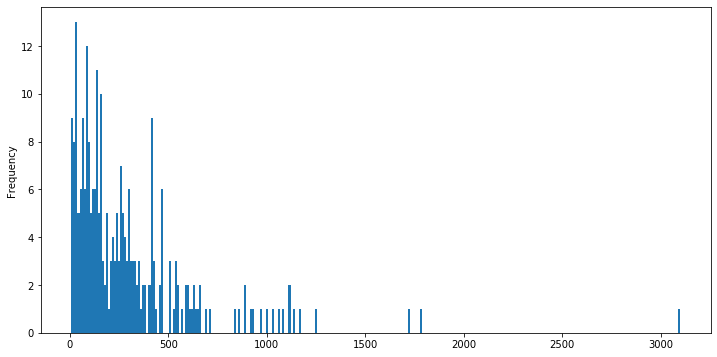

In [21]:
plt.figure(figsize=(12,6))
newdf['length'].plot(bins=300, kind='hist') 

In [23]:
newdf.length.describe()

count     258.000000
mean      297.038760
std       336.895934
min         8.000000
25%        87.000000
50%       196.500000
75%       407.500000
max      3098.000000
Name: length, dtype: float64

### Deleting the row with outlier

In [27]:
newdf.loc[newdf['length']==3098.000000]

,Skill Set,Opt-In Status,Opt_In,length
608,20 years of of verifiable track record with 16...,Opt-In not requested,0,3098


In [29]:
newdf.drop(index=608,inplace=True)
newdf

C:\Users\stuti\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


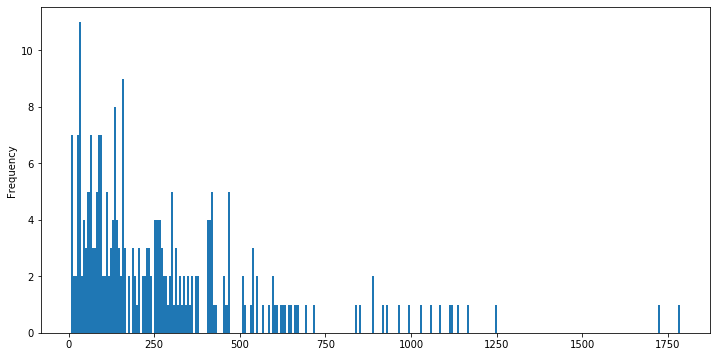

In [30]:
plt.figure(figsize=(12,6))
newdf['length'].plot(bins=300, kind='hist') 

### Trying to visualize if skill length is a distinguishing feature between selected and rejected candidate

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D019C3D1C8>,
      dtype=object)

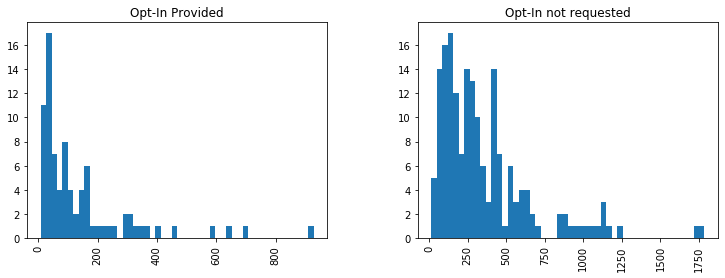

In [31]:
newdf.hist(column='length', by='Opt-In Status', bins=50,figsize=(12,4))

### Removing punctuation

In [33]:
import string

In [34]:
def text_process(mess):

    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split()]

In [36]:
newdf.head()

,Skill Set,Opt-In Status,Opt_In,length
2,adsadaasda,Opt-In Provided,1,10
5,"continuous development, C Programming Language...",Opt-In not requested,0,165
6,"self development, technical and innovative ski...",Opt-In not requested,0,133
7,"HTML, Machine Learning, MySQL, \nPython",Opt-In not requested,0,38
8,"Container orchestration management, Good time ...",Opt-In Provided,1,929


In [37]:
newdf['Skill Set'].head(5).apply(text_process)

2                                         [adsadaasda]
5    [continuous, development, C, Programming, Lang...
6    [self, development, technical, and, innovative...
7             [HTML, Machine, Learning, MySQL, Python]
8    [Container, orchestration, management, Good, t...
Name: Skill Set, dtype: object

### Using SciKit Learn's CountVectorizer. This model will convert skill texts to a matrix of token counts.

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(newdf['Skill Set'])
print(len(bow_transformer.vocabulary_)) #total no. of vocabulary words

1876


In [40]:
skill6 = newdf['Skill Set'][6]
print(skill6)

self development, technical and innovative skills, C++, DBMS, Java, Java 2, Microsoft Office, English, Indian > Hindi, Indian > Tamil


### Vector representation of the 6th skill

In [41]:
bow6 = bow_transformer.transform([skill6])
print(bow6)
print(bow6.shape)
#this means 16 unique words in skill6. 2 of them appear twice

  (0, 5)	1
  (0, 201)	1
  (0, 325)	1
  (0, 403)	1
  (0, 535)	1
  (0, 583)	2
  (0, 638)	2
  (0, 759)	1
  (0, 825)	1
  (0, 1187)	1
  (0, 1335)	1
  (0, 1454)	1
  (0, 1571)	1
  (0, 1768)	1
  (0, 1782)	1
  (0, 1820)	1
(1, 1876)


### This means that there are 16 unique words in skill number 6. Two of them appear twice, the rest only once. Now we check and confirm which ones appear twice:

In [43]:
print(bow_transformer.get_feature_names()[583])
print(bow_transformer.get_feature_names()[638])

Indian
Java


### Using **.transform** on our Bag-of-Words (bow) transformed object and transform the entire column of skills. Moving ahead we check out how the bag-of-words counts for the entire skill corpus is a large, sparse matrix

In [44]:
skill_bow = bow_transformer.transform(newdf['Skill Set'])
print('Shape of Sparse Matrix: ', skill_bow.shape)
print('Amount of Non-Zero occurences: ', skill_bow.nnz)

Shape of Sparse Matrix:  (257, 1876)
Amount of Non-Zero occurences:  6887


In [45]:
sparsity = (100.0 * skill_bow.nnz / (skill_bow.shape[0] * skill_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 1


### Now weighting can be done with TF-IDF, using scikit-learn's TfidfTransformer.

In [49]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(skill_bow)
tfidf6 = tfidf_transformer.transform(bow6)
print(tfidf6)

  (0, 1820)	0.29625961657226135
  (0, 1782)	0.19462762221379426
  (0, 1768)	0.3507457128764589
  (0, 1571)	0.3507457128764589
  (0, 1454)	0.204856391428708
  (0, 1335)	0.17952609396299204
  (0, 1187)	0.26719438918094623
  (0, 825)	0.15704007290068145
  (0, 759)	0.12150696967882799
  (0, 638)	0.3476125242240214
  (0, 583)	0.2729318262663391
  (0, 535)	0.1446167724272313
  (0, 403)	0.13960339961568993
  (0, 325)	0.30617238654265555
  (0, 201)	0.16140145357739613
  (0, 5)	0.29625961657226135


### Transforming the entire bag-of-words corpus into TF-IDF corpus at once

In [47]:
skill_tfidf = tfidf_transformer.transform(skill_bow)
print(skill_tfidf.shape)

(257, 1876)


### Training the model

In [48]:
from sklearn.naive_bayes import MultinomialNB
opt_in_model = MultinomialNB().fit(skill_tfidf, newdf['Opt-In Status'])

In [51]:
print('predicted:', opt_in_model.predict(tfidf6)[0])
print('expected:', newdf['Opt-In Status'][6])

predicted: Opt-In not requested
expected: Opt-In not requested


### Model evaluation

In [52]:
all_predictions = opt_in_model.predict(skill_tfidf)


In [54]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(newdf['Opt-In Status'], all_predictions))

                      precision    recall  f1-score   support

     Opt-In Provided       1.00      0.33      0.50        81
Opt-In not requested       0.77      1.00      0.87       176

            accuracy                           0.79       257
           macro avg       0.88      0.67      0.68       257
        weighted avg       0.84      0.79      0.75       257



In [55]:
print (confusion_matrix(newdf['Opt-In Status'], all_predictions))

[[ 27  54]
 [  0 176]]
